Goal: To determine what topics / questions are most interesting to those learning data science.

Data Obtained From:
https://data.stackexchange.com/datascience/query/edit/1391050#resultSets

Via the Query:
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
  FROM posts
  WHERE CreationDate >= '2019-01-01 00:00:00' 
        AND CreationDate < '2020-01-01 00:00:00'
  ORDER BY Id;
  
downloaded to CSV 'questions_2019.csv'

In [1]:
import pandas as pd
posts = pd.read_csv('questions_2019.csv', parse_dates = ['CreationDate'])

In [2]:
print(posts.shape)

posts.head()

(14681, 8)


,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43360,2,2019-01-01 00:27:48,12,NaN,NaN,NaN,NaN
1,43361,2,2019-01-01 02:50:07,0,NaN,NaN,NaN,NaN
2,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,NaN
3,43364,2,2019-01-01 05:49:35,1,NaN,NaN,NaN,NaN
4,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0


# Data Cleaning

In [3]:
posts.dtypes

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount               float64
Tags                     object
AnswerCount             float64
FavoriteCount           float64
dtype: object

In [4]:
posts.isnull().sum()

Id                   0
PostTypeId           0
CreationDate         0
Score                0
ViewCount         7905
Tags              7905
AnswerCount       7905
FavoriteCount    13059
dtype: int64

The first four columns have no null values. Now we'll investigate those with missing values.

In [5]:
posts[posts['ViewCount'].isnull()]['PostTypeId'].unique()

array([2, 5, 4, 6])

Questions in categories 2, 4, 5, 6 have no associated viewcounts. From the PostType database, 

PostType ID | Descriptions
 ------ | :------
1 | Question
2 | Answer
3 | Wiki
4 | TagWikiExcerpt
5 | TagWiki
6 | ModeratorNomination
7 | WikiPlaceholder
8 | PrivilegeWiki

In [6]:
posts['PostTypeId'].value_counts()

2    7715
1    6776
5      91
4      91
6       8
Name: PostTypeId, dtype: int64

So, only questions have ViewCounts, and probably Tags and AnswerCounts as well. Perhaps we should just filter by Questions.

In [7]:
questions = posts[posts['PostTypeId'] == 1].copy()

questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,NaN
4,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0
5,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,NaN
7,43370,1,2019-01-01 10:06:03,2,37.0,<classification>,0.0,NaN
11,43374,1,2019-01-01 13:18:02,3,39.0,<deep-learning><time-series><cnn><convolution>,1.0,NaN


In [8]:
questions.isnull().sum()

Id                  0
PostTypeId          0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    5154
dtype: int64

Now only the "FavoriteCount" has null values.

In [9]:
questions['FavoriteCount'].value_counts(dropna = False)

NaN     5154
1.0     1030
2.0      260
0.0      158
3.0       73
4.0       40
5.0       22
6.0       14
7.0        8
8.0        5
9.0        3
12.0       2
14.0       2
17.0       1
11.0       1
13.0       1
15.0       1
25.0       1
Name: FavoriteCount, dtype: int64

It's probably safe to assume the null values have zero favorite counts, so we'll convert that.

In [10]:
questions.fillna(value = {'FavoriteCount':0}, inplace = True)

In [11]:
questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,0.0
4,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0
5,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,0.0
7,43370,1,2019-01-01 10:06:03,2,37.0,<classification>,0.0,0.0
11,43374,1,2019-01-01 13:18:02,3,39.0,<deep-learning><time-series><cnn><convolution>,1.0,0.0


We notice that the `Tags` column has multiple tags in it, each enclosed in <>. Perhaps we can clean this column and convert it to a list of tags.

In [45]:
#This converts <> list to [,,,] list
questions['Tags_list'] = questions['Tags'].str.strip(r'[<>]').str.split('><')

questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,Tags_list
2,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,0.0,"[machine-learning, nlp]"
4,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0,"[deep-learning, image-classification, convolut..."
5,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,0.0,"[scikit-learn, tensorflow, scipy]"
7,43370,1,2019-01-01 10:06:03,2,37.0,<classification>,0.0,0.0,[classification]
11,43374,1,2019-01-01 13:18:02,3,39.0,<deep-learning><time-series><cnn><convolution>,1.0,0.0,"[deep-learning, time-series, cnn, convolution]"


# Tag Analysis

Below, we also create a dataframe of each tag separated out so that we can easily count the number of appearances of each tag. Then we merge it to the database to associate viewcount to tag.

In [40]:
#This extracts all tags and creates one row for each tag (so a multi-index)
tag_list = questions['Tags'].str.extractall('<([a-z-]+)>').reset_index(1)
tag_list = tag_list.rename(columns = {0: 'tag'})
tag_list.head()

,match,tag
2,0,machine-learning
2,1,nlp
4,0,deep-learning
4,1,image-classification
4,2,convolutional-neural-network


In [44]:
merged = tag_list.merge(questions, how = 'left', left_index = True, right_index = True)
merged.head(10)

,match,tag,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,Tags_list
2,0,machine-learning,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,0.0,"[machine-learning, nlp]"
2,1,nlp,43363,1,2019-01-01 03:53:02,0,36.0,<machine-learning><nlp>,1.0,0.0,"[machine-learning, nlp]"
4,0,deep-learning,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0,"[deep-learning, image-classification, convolut..."
4,1,image-classification,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0,"[deep-learning, image-classification, convolut..."
4,2,convolutional-neural-network,43366,1,2019-01-01 06:02:07,3,60.0,<deep-learning><image-classification><convolut...,1.0,1.0,"[deep-learning, image-classification, convolut..."
5,0,scikit-learn,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,0.0,"[scikit-learn, tensorflow, scipy]"
5,1,tensorflow,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,0.0,"[scikit-learn, tensorflow, scipy]"
5,2,scipy,43367,1,2019-01-01 06:16:26,0,27.0,<scikit-learn><tensorflow><scipy>,1.0,0.0,"[scikit-learn, tensorflow, scipy]"
7,0,classification,43370,1,2019-01-01 10:06:03,2,37.0,<classification>,0.0,0.0,[classification]
11,0,deep-learning,43374,1,2019-01-01 13:18:02,3,39.0,<deep-learning><time-series><cnn><convolution>,1.0,0.0,"[deep-learning, time-series, cnn, convolution]"


In [121]:
print('Number of tags:', tag_list['tag'].value_counts().shape[0])

Number of tags: 483


There are a lot of tags! Let's see the 20 most common ones:

In [129]:
tag_counts = tag_list['tag'].value_counts(normalize = True).to_frame().reset_index().rename(columns = {'index':'tag', 'tag':'percentage_of_tags'})
tag_counts.head(20)

,tag,percentage_of_tags
0,machine-learning,0.104248
1,python,0.070654
2,deep-learning,0.043457
3,neural-network,0.040039
4,keras,0.034473
5,classification,0.028271
6,scikit-learn,0.021875
7,tensorflow,0.020215
8,nlp,0.019189
9,cnn,0.018506


In [100]:
tag_views = merged.pivot_table(values = 'ViewCount', index = 'tag', 
                                aggfunc = 'sum').sort_values('ViewCount', ascending = False).reset_index()
tag_views.head(25)

,tag,ViewCount
0,python,2072499.0
1,machine-learning,1341003.0
2,pandas,968461.0
3,keras,876767.0
4,deep-learning,764758.0
5,neural-network,659452.0
6,scikit-learn,496244.0
7,tensorflow,447949.0
8,classification,378393.0
9,dataframe,361337.0


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

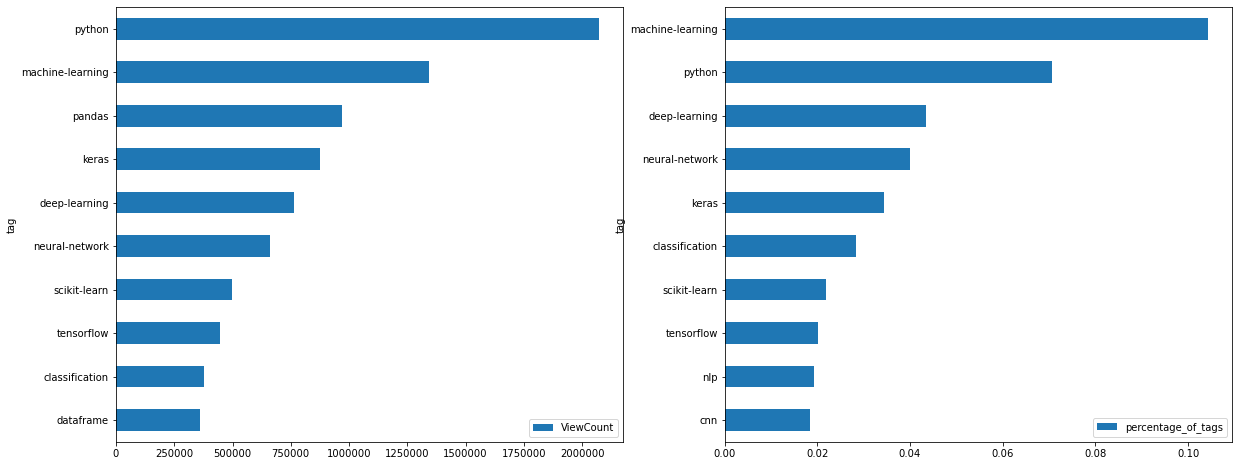

In [131]:
fig, axs = plt.subplots(1,2,figsize = (20,8))
tag_views.head(10).plot(x = 'tag', y = 'ViewCount', kind = 'barh', ax=axs[0])
#plt.xticks(rotation = 45)
axs[0].invert_yaxis()
axs[0].ticklabel_format(axis = 'x', style = 'plain')

tag_counts.head(10).plot(x = 'tag', kind = 'barh', ax = axs[1])
axs[1].invert_yaxis()
axs[1].ticklabel_format(axis = 'x', style = 'plain')


plt.show()

Comparing the charts above, we see the top ten subjects by both view counts and percentage of tags are quite similar; 8 or 10 are in both: *python, machine learning, keras, deep learning, neural network, scikit-learn, tensorflow, and classification*. In addition, 'pandas' is quite high on the view counts list though not in percent of tags, so should also be considered. Rounding out the top ten are dataframe in view count and rip / cnn in percent of tags.

COULD DO - Further look into relationships between these tags to make recommendations

# Tracking Deep Learning

Let's look at the growth of the "deep learning" topic. We identified posts that were tagged with 'deep_learning' using the query:

SELECT Id, CreationDate, Tags
  FROM posts
  WHERE PostTypeId = 1 AND Tags LIKE '%deep-learning%'
  ORDER BY CreationDate

In [149]:
dlq = pd.read_csv('deep_learning_questions.csv', parse_dates = ['CreationDate'])
print('Number of rows:', dlq.shape[0])
dlq.head()

Number of rows: 3690


,Id,CreationDate,Tags
0,410,2014-06-16 18:08:38,<machine-learning><neural-network><deep-learni...
1,731,2014-07-13 09:04:39,<neural-network><deep-learning>
2,1253,2014-10-11 10:24:01,<machine-learning><data-mining><neural-network...
3,2504,2014-11-20 06:49:00,<machine-learning><classification><deep-learning>
4,2651,2014-12-08 22:37:32,<machine-learning><deep-learning>


In [152]:
import datetime as dt
#dlq['CreationDate'].str.extract('([0-9]{4}-[0-9]{2})').dt.strptime

dlq['year'] = dlq['CreationDate'].dt.year
dlq['month'] = dlq['CreationDate'].dt.month

dlq.head()

,Id,CreationDate,Tags,year,month
0,410,2014-06-16 18:08:38,<machine-learning><neural-network><deep-learni...,2014,6
1,731,2014-07-13 09:04:39,<neural-network><deep-learning>,2014,7
2,1253,2014-10-11 10:24:01,<machine-learning><data-mining><neural-network...,2014,10
3,2504,2014-11-20 06:49:00,<machine-learning><classification><deep-learning>,2014,11
4,2651,2014-12-08 22:37:32,<machine-learning><deep-learning>,2014,12


<AxesSubplot:>

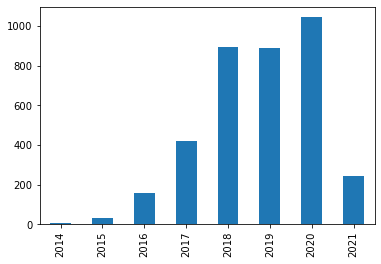

In [159]:
dlq['year'].value_counts().sort_index().plot(kind = 'bar')

From the above we can see it's become very popular since 2018. We should exclude the 2021 data since it's an incomplete year:

<AxesSubplot:>

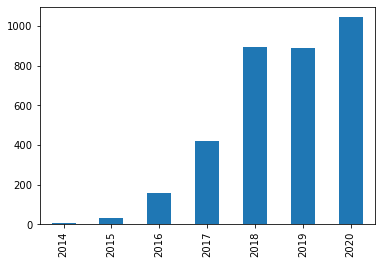

In [164]:
dlq2 = dlq[dlq['year'] != 2021].copy()

dlq2['year'].value_counts().sort_index().plot(kind = 'bar')

We should also compare this to the number of posts overall in each time period, so let's read in a database that contains that (really could have used this one from the start, oops):

In [165]:
allq = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
allq.head()

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,<machine-learning>
1,7,2014-05-14 00:11:06,<education><open-source>
2,14,2014-05-14 01:25:59,<data-mining><definitions>
3,15,2014-05-14 01:41:23,<databases>
4,16,2014-05-14 01:57:56,<machine-learning><bigdata><libsvm>


(0.0, 7000.0)

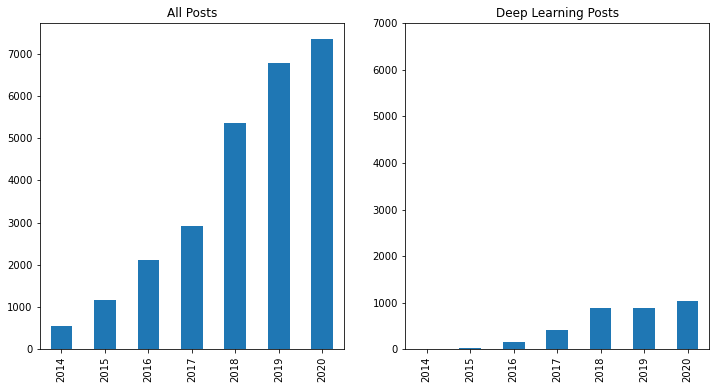

In [183]:

allq['year'] = allq['CreationDate'].dt.year
allq['month'] = allq['CreationDate'].dt.month

allq2 = allq[allq['year'] != 2021].copy()

fig, axs = plt.subplots(1,2, figsize = (12,6))
allq2['year'].value_counts().sort_index().plot(kind = 'bar', ax = axs[0])
axs[0].set_title('All Posts')
dlq2['year'].value_counts().sort_index().plot(kind = 'bar', ax = axs[1])
axs[1].set_title('Deep Learning Posts')
axs[1].set_ylim((0,7000))

The shape of the two graphs is quite similar; the topic was proportionally more popular in 2018.

We could find deep learning as % of all posts as well and graph that:

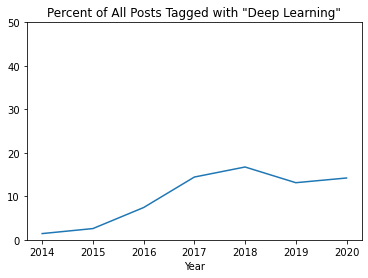

In [193]:
dlq_counts = dlq2['year'].value_counts().sort_index().to_frame()
allq_counts = allq2['year'].value_counts().sort_index().to_frame()

dlq_counts.head()

dl_vs_all = pd.merge(left = dlq_counts, right = allq_counts, how = 'left', 
         left_index = True, right_index = True).rename(columns = {'year_x': 'dlq', 'year_y': 'allq'})

dl_vs_all['percent_dl'] = round(dl_vs_all['dlq'] / dl_vs_all['allq'] * 100, 2)
fig, ax = plt.subplots()
dl_vs_all[['percent_dl']].plot.line(ylim=(0,50), ax=ax, legend = False)
ax.set_xlabel('Year')
ax.set_title('Percent of All Posts Tagged with "Deep Learning"')
plt.show()

I would probably want to compare this with some of the other key words (for example, find this percentage & make a line chart for all of the top ten tags). However, it seems that it has been a fairly popular tag for a few years, and interest remains strong.

Looking at the solutions, here is how I could improve this:
- For comparing pairs of tags, I actually can make a matrix, by creating a dataframe using tags as indices, and then using a heatmap to show associations
- For classifying the deep learning posts, I could use a broader range of tags than just 'deep-learning', but then follow much of the same procedure
- They follow progress by quarters rather than by years, and turn the datetimes into strings: '18Q3'. These still plot in order.

Solutions: https://github.com/dataquestio/solutions/blob/master/Mission469Solutions.ipynb

Also this guy has some nice graphs! You can review how to use seaborn to make your graphs more aesthetic. (Or maybe redo the data visualization course?)
https://nbviewer.jupyter.org/urls/community.dataquest.io/uploads/short-url/CzhCw0bS0YjIplx5ZsJyzSeyhY.ipynb